## Matrici e norme
#### Exercise 1.1.

Si consideri la matrice $A$
$$A=\begin{pmatrix} 1 & 2 \\ 0.499 & 1.001 \end{pmatrix}$$
- Calcolare con `numpy.linalg.norm()`
  - norma 1
  - norma 2
  - norma di Frobenius
  - norma di infinito di A

In [5]:
import numpy as np

# Definire la matrice A
A = np.array([[1, 2],
              [0.499, 1.001]])

# Calcolare la norma 1 di A
norma1 = np.linalg.norm(A, 1)

# Calcolare la norma 2 di A
norma2 = np.linalg.norm(A, 2)

# Calcolare la norma Frobenius di A
norma_frobenius = np.linalg.norm(A, 'fro')

# Calcolare la norma infinito di A
norma_infinito = np.linalg.norm(A, np.inf)

# Stampare i risultati
print("Norma 1 di A:\t\t", norma1)
print("Norma 2 di A:\t\t", norma2)
print("Norma Frobenius di A:\t", norma_frobenius)
print("Norma infinito di A:\t", norma_infinito)

Norma 1 di A:		 3.001
Norma 2 di A:		 2.500200104037774
Norma Frobenius di A:	 2.5002003919686118
Norma infinito di A:	 3.0


- Calcolare il numero di condizionamento id $A$ con `numpy.linalg.cond()`

In [7]:
cond1 = np.linalg.cond(A, p=1)
cond2 = np.linalg.cond(A, p=2)
condfro = np.linalg.cond(A, p='fro')
condinf = np.linalg.cond(A, p=np.inf)

print ('K(A)_1 \t\t\t\t\t =', cond1)
print ('K(A)_2 \t\t\t\t\t =', cond2)
print ('K(A)_fro \t\t\t\t =', condfro)
print ('K(A)_inf \t\t\t\t =', condinf)

Numero di cond. di A:	 2083.6668534103555


- Considerare il vettore colonna $x = (1, 1)^T$ e calcolare il corrispondente termine noto $b$ per il sistema lineare $Ax = b$.

In [9]:
# Definire il vettore colonna x
x = np.ones((2,1))

# Calcolare il termine noto b
b = np.dot(A, x)

# Stampare il risultato
print("Termine noto b:", b)

Termine noto b: [3.  1.5]


Considerare ora il vettore $\tilde{b} = (3, 1.4985)^T$ e verifica che $\tilde{x} = (2, 0.5)^T$ è soluzione del sistema $A\tilde{x} =\tilde{b}$

In [11]:
# Definire il vettore colonna ˜x
x_tilde = np.array([2, 0.5])

# Definire il vettore colonna ˜b
b_tilde = np.array([3, 1.4985])

# Calcolare A˜x
Ax_tilde = np.dot(A, x_tilde)

# Verificare se A˜x è uguale a ˜b
if np.array_equal(Ax_tilde, b_tilde):
    print("Il vettore ~x è una soluzione del sistema A~x = ~b.")
else:
    print("Il vettore ~x non è una soluzione del sistema A~x = ~b.")

Il vettore ~x è una soluzione del sistema A~x = ~b.


Calcolare la norma $2$ della perturbazione sui termini noti $\Delta_b = ∥b−\tilde{b}∥_2$ e la norma $2$ della perturbazione sulle soluzioni $\Delta_x = ∥x − \tilde{x}∥_2$. Confrontare $\Delta_b$ con $\Delta_x$.

## Metodi diretti
#### Exercise 2.1

Si consideri la matrice
$$A=\begin{pmatrix}3& -1 & 1 & -2 \\ 0 & 2 & 5 & -1 \\ 1 & 0 & -7 & 1 \\ 0 & 2 & 1 & 1\end{pmatrix}$$

In [103]:
import numpy as np

# Definisci la matrice A
A = np.array([[3, -1, 1, 2],
              [0, 2, 5, -1],
              [1, 0, -7, 1],
              [0, 2, 1, 1]])

n = A.shape[1]

x = np.ones((n,1))
b = np.matmul(A,x) # b = Ax
print(b)

[[ 5.]
 [ 6.]
 [-5.]
 [ 4.]]


In [69]:
import scipy.linalg
# help(scipy.linalg)
import scipy.linalg as LUdec # è un module con ['lu', 'lu_solve', 'lu_factor']
# help(LUdec.lu_factor)
# help(LUdec.lu)

Help on function lu_solve in module scipy.linalg.decomp_lu:

lu_solve(lu_and_piv, b, trans=0, overwrite_b=False, check_finite=True)
    Solve an equation system, a x = b, given the LU factorization of a
    
    Parameters
    ----------
    (lu, piv)
        Factorization of the coefficient matrix a, as given by lu_factor
    b : array
        Right-hand side
    trans : {0, 1, 2}, optional
        Type of system to solve:
    
        =====  =========
        trans  system
        =====  =========
        0      a x   = b
        1      a^T x = b
        2      a^H x = b
        =====  =========
    overwrite_b : bool, optional
        Whether to overwrite data in b (may increase performance)
    check_finite : bool, optional
        Whether to check that the input matrices contain only finite numbers.
        Disabling may give a performance gain, but may result in problems
        (crashes, non-termination) if the inputs do contain infinities or NaNs.
    
    Returns
    -------
 

In [98]:
P, L, U = LUdec.lu(A)

# Stampa le matrici P, L e U
# print("Matrice P:")
# print(P)
# print("Matrice L:")
# print(L)
# print("Matrice U:")
# print(U)
# print('piv', piv, '\n')

# Verifica la correttezza dell'output
# Moltiplica le matrici P, L e U e verifica se il risultato è uguale alla matrice originale A
A_reconstructed = np.dot(P, np.dot(L, U))

# Confronta A_reconstructed con A
if np.array_equal(A_reconstructed, A):
    print("La fattorizzazione LU è corretta.")
else:
    print("La fattorizzazione LU non è corretta.")

La fattorizzazione LU è corretta.


Risolvere il sistema lineare con la funzione `scipy.linalg.lu_solve` oppure urilizzando la funzione `scipy.linalg.solve_triangular`.

In [104]:
P, L, U, = LUdec.lu(A)

y = LUdec.solve_triangular(U, LUdec.solve_triangular(L, b, lower=True), lower=True)

print("Soluzione del sistema lineare: ")
print(y)
print('\n', x)

Soluzione del sistema lineare: 
[[1.66666667]
 [3.        ]
 [0.93877551]
 [1.        ]]

 [[1.]
 [1.]
 [1.]
 [1.]]


#### Exercise 2.2
si ripeta l'esercizio precedente sulla matrice di Hilbert, che si può generare con la funzione `A = scipy.linalg.hilbert(n)` per $n=5,\dots,10$. In particolare:
- Calcolare il numero di condizionamento di $A$ e rappresentarlo in un grafico al variare di $n$.
- Considerare il vettore colonna $x=(1,\dots,1)^T$, calcola il corrispondente termine noto $b$ per il sistema lineare $Ax=b$ e la relativa soluzione $\tilde{x}$ usando la fattorizzazione di Cholesky come nel caso precedente.
- Si rappresenti l'errore relativo al variare delle dimensioni della matrice.

La 1 ° fattorizzazione LU è corretta.
La 2 ° fattorizzazione LU non è corretta.
La 3 ° fattorizzazione LU non è corretta.
La 4 ° fattorizzazione LU non è corretta.
La 5 ° fattorizzazione LU non è corretta.
La 6 ° fattorizzazione LU non è corretta.


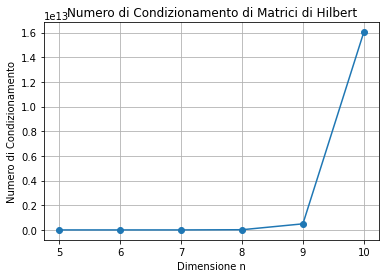

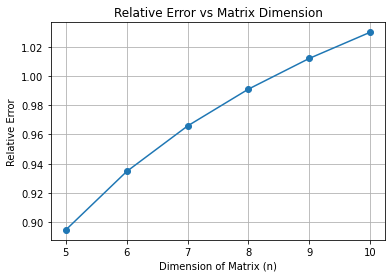

In [142]:
condition_numbers = []
errors = []
max = 10 + 1
n_values = list(range(5, max))

for n in range(5, max, 1):
    # tutto quello fatto in 2.1 da per n = 5,...,10
    x = np.ones((n, 1))
    A = scipy.linalg.hilbert(n)
    b = np.matmul(A, x)
    P, L, U = LUdec.lu(A)
    A_reconstructed = np.dot(P, np.dot(L, U))
    if np.array_equal(A_reconstructed, A):
        print("La", n-4,"° fattorizzazione LU è corretta.")
    else:
        print("La", n-4,"° fattorizzazione LU non è corretta.")
    y = LUdec.solve_triangular(U, LUdec.solve_triangular(L, b, lower=True), lower=True)
    ## Cond number
    cond_number = np.linalg.cond(A)
    condition_numbers.append(cond_number)
    ## Cholesky
    L = LUdec.cholesky(A, lower=True)
    y = LUdec.solve(L, b)
    x_tilde = LUdec.solve(L.T, y)
    ## Calcola l'errore relativo
    relative_error = np.linalg.norm(x - y) / np.linalg.norm(x)
    errors.append(relative_error)


import matplotlib.pyplot as plt

plt.plot(n_values, condition_numbers, marker='o', linestyle='-')
plt.xlabel('Dimensione n')
plt.ylabel('Numero di Condizionamento')
plt.title('Numero di Condizionamento di Matrici di Hilbert')
plt.grid(True)
plt.show()

plt.plot(range(5, max), errors, marker='o')
plt.xlabel('Dimension of Matrix (n)')
plt.ylabel('Relative Error')
plt.title('Relative Error vs Matrix Dimension')
plt.grid()
plt.show()

In [143]:
help(solve_triangular)

Help on function solve_triangular in module scipy.linalg.basic:

solve_triangular(a, b, trans=0, lower=False, unit_diagonal=False, overwrite_b=False, debug=None, check_finite=True)
    Solve the equation `a x = b` for `x`, assuming a is a triangular matrix.
    
    Parameters
    ----------
    a : (M, M) array_like
        A triangular matrix
    b : (M,) or (M, N) array_like
        Right-hand side matrix in `a x = b`
    lower : bool, optional
        Use only data contained in the lower triangle of `a`.
        Default is to use upper triangle.
    trans : {0, 1, 2, 'N', 'T', 'C'}, optional
        Type of system to solve:
    
        ========  =========
        trans     system
        ========  =========
        0 or 'N'  a x  = b
        1 or 'T'  a^T x = b
        2 or 'C'  a^H x = b
        ========  =========
    unit_diagonal : bool, optional
        If True, diagonal elements of `a` are assumed to be 1 and
        will not be referenced.
    overwrite_b : bool, optional
 